In [151]:
# 필요 라이브러리 불러오기
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [152]:
# 데이터 리사이징
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [153]:
# 가위 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

324  images to be resized.
324  images resized.
가위 이미지 resize 완료!


In [154]:
# 바위 이미지 리사이징
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

599  images to be resized.
599  images resized.
바위 이미지 resize 완료!


In [155]:
# 보 이미지 리사이징

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

499  images to be resized.
499  images resized.
보 이미지 resize 완료!


In [156]:
# 데이터 불러오고 각 클래스마다 행렬형태로 변환
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=1422):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor"
(x_train, y_train)=load_data(image_dir_path)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=777)
x_train_norm, x_val_norm = x_train/255.0, x_val/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1422 입니다.
x_train shape: (995, 28, 28, 3)
y_train shape: (995,)


라벨:  0


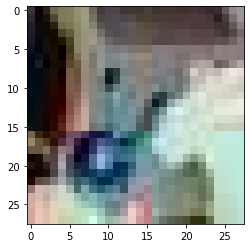

In [157]:
# 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

In [158]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_53 (Dense)             

Epoch 1/10
32/32 [==============================] - 1s 26ms/step - loss: 9.2635 - accuracy: 0.3789 - val_loss: 2.2610 - val_accuracy: 0.4778
Epoch 2/10
32/32 [==============================] - 1s 23ms/step - loss: 0.9315 - accuracy: 0.6020 - val_loss: 2.2442 - val_accuracy: 0.6651
Epoch 3/10
32/32 [==============================] - 1s 22ms/step - loss: 0.5580 - accuracy: 0.7648 - val_loss: 2.2346 - val_accuracy: 0.7564
Epoch 4/10
32/32 [==============================] - 1s 23ms/step - loss: 0.3771 - accuracy: 0.8573 - val_loss: 2.2197 - val_accuracy: 0.7892
Epoch 5/10
32/32 [==============================] - 1s 22ms/step - loss: 0.3173 - accuracy: 0.8804 - val_loss: 2.2117 - val_accuracy: 0.8290
Epoch 6/10
32/32 [==============================] - 1s 23ms/step - loss: 0.1983 - accuracy: 0.9327 - val_loss: 2.2065 - val_accuracy: 0.9063
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 0.1264 - accuracy: 0.9749 - val_loss: 2.1997 - val_accuracy: 0.8899
Epoch 8/10
32

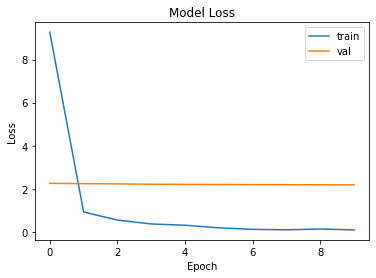

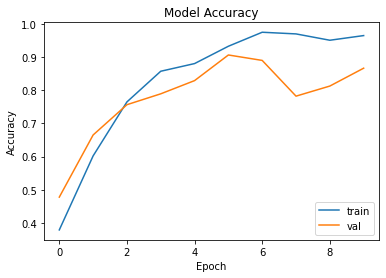

In [159]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val_norm, y_val))

# 모델 학습에 대한 accuracy 시각화
# 훈련 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 훈련 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [160]:
# 보 테스트 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test/paper"
resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

30  images to be resized.
30  images resized.
보 테스트 이미지 resize 완료!


In [161]:
# 가위 테스트 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test/scissor"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

30  images to be resized.
30  images resized.
가위 테스트 이미지 resize 완료!


In [162]:
# 바위 테스트 이미지 사이즈 바꾸기 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test/rock"
resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")

30  images to be resized.
30  images resized.
바위 테스트 이미지 resize 완료!


In [163]:
# 테스트 데이터 행령 변환
import numpy as np

def load_data(img_path, number_of_data=90):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/mainquest3/rock_paper_scissor/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 90 입니다.
x_test shape: (90, 28, 28, 3)
y_test shape: (90,)


In [164]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

3/3 - 0s - loss: 0.7832 - accuracy: 0.6333
test_loss: 0.7832118272781372
test_accuracy: 0.6333333253860474


In [165]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.7437978e-01 2.5587382e-02 6.0376888e-06 1.0188016e-10 8.6872472e-20
 3.0382001e-13 8.4446296e-15 2.6817836e-05 5.6902908e-18 2.0888133e-15]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


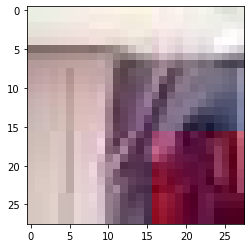

In [166]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.76313889e-01 8.33466426e-02 4.40290272e-01 4.60719912e-06
 1.36246535e-11 3.02789340e-06 7.26848470e-10 4.15499017e-05
 1.78293880e-10 7.03121112e-12]
라벨: 2, 예측결과: 0


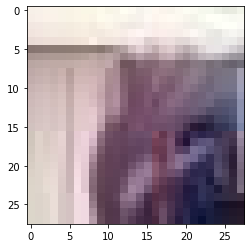

예측확률분포: [9.79757383e-02 1.40676484e-01 7.60397792e-01 1.03262655e-05
 1.34008622e-13 3.02412206e-09 1.09211182e-10 9.39682068e-04
 8.85508333e-10 8.27096638e-12]
라벨: 1, 예측결과: 2


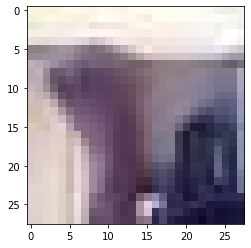

예측확률분포: [4.6014595e-01 5.3400367e-01 4.6124430e-03 1.1877116e-08 2.6259801e-17
 1.4972629e-10 1.4340658e-10 1.2378932e-03 9.6073247e-13 1.0234638e-11]
라벨: 0, 예측결과: 1


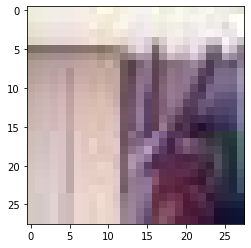

예측확률분포: [5.6492037e-01 5.6077377e-03 4.2940742e-01 7.5959451e-06 4.2172755e-11
 5.0421886e-07 1.2153005e-11 5.6319896e-05 6.5022814e-12 3.4376618e-12]
라벨: 2, 예측결과: 0


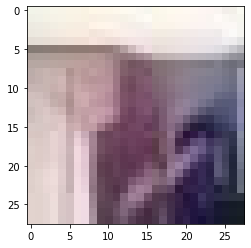

예측확률분포: [6.7788118e-01 2.7746448e-01 4.3577731e-02 1.5144487e-08 1.6179854e-14
 2.4467171e-09 4.0380289e-08 1.0765748e-03 5.4736482e-10 2.8688715e-10]
라벨: 1, 예측결과: 0


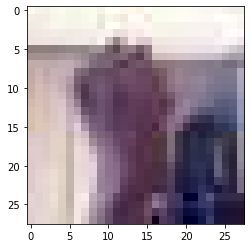

In [167]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [169]:
# 바꿔 볼 수 있는 하이퍼파라미터들
from tensorflow.keras import optimizers
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=13

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3))) 
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu')) 
model.add(keras.layers.MaxPool2D(2, 2))

# model.add(keras.layers.Conv2D(n_channel_3, (2,2), activation='relu')) 
# model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 27, 27, 16)        208       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                36896     
_________________________________________________________________
dense_57 (Dense)             (None, 3)               